### Data Loading and Inspection:

Loaded the dataset and inspected its structure, including checking the data types and the first few rows.

In [166]:
import pandas as pd 

data = pd.read_csv('train.csv')
data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [167]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


### Data Cleaning:

Created a new column y for the target variable.
Dropped rows with any missing values.

In [168]:
data['y'] = data['target']

In [169]:
data.drop(['target'], axis=1, inplace=True)

In [170]:
data.dropna(inplace=True, how='any')
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5080 entries, 31 to 7581
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        5080 non-null   int64 
 1   keyword   5080 non-null   object
 2   location  5080 non-null   object
 3   text      5080 non-null   object
 4   y         5080 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 238.1+ KB


## Data Preprocessing
### Text Cleaning:

Remove special characters, URLs, and HTML tags.
Normalize text (convert to lowercase, remove stopwords, apply stemming or lemmatization).

In [171]:
import re
from bs4 import BeautifulSoup

def clean_text(text):
    text = BeautifulSoup(text, "html.parser").get_text()  # Remove HTML tags
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove special characters
    return text

data['text'] = data['text'].apply(clean_text)

data['text'].head(20)


C:\Users\MaiElBaradei\AppData\Local\Temp\ipykernel_15312\2378855573.py:5: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, "html.parser").get_text()  # Remove HTML tags


31                     bbcmtd Wholesale Markets ablaze 
32           We always try to bring the heavy metal RT 
33    AFRICANBAZE Breaking newsNigeria flag set abla...
34                    Crying out for more Set me ablaze
35    On plus side LOOK AT THE SKY LAST NIGHT IT WAS...
36    PhDSquares mufc theyve built so much hype arou...
37                     INEC Office in Abia Set Ablaze  
39                                Ablaze for you Lord D
40                             Check these out     nsfw
42    Had an awesome time visiting the CFC head offi...
46    How the West was burned Thousands of wildfires...
48                             Check these out     nsfw
49    First night with retainers in Its quite weird ...
50    Deputies Man shot before Brighton home set abl...
51    Man wife get six years jail for setting ablaze...
52    SANTA CRUZ  Head of the St Elizabeth Police Su...
53    Police Arsonist Deliberately Set Black Church ...
54    Noches ElBestia AlexisSanchez happy to see

In [172]:
data.drop(['id'], axis=1, inplace=True)

In [173]:
data.isnull().sum()

keyword     0
location    0
text        0
y           0
dtype: int64

In [174]:
data.shape

(5080, 4)

In [175]:
import nltk
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def normalize_text(text):
    words = text.lower().split()
    words = [word for word in words if word not in stop_words]
    words = [lemmatizer.lemmatize(word) for word in words]
    words = [PorterStemmer().stem(word) for word in words]
    return ' '.join(words)

data['text'] = data['text'].apply(normalize_text)

data['text'].head(20)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\MaiElBaradei\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\MaiElBaradei\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


31                         bbcmtd wholesal market ablaz
32                       alway tri bring heavi metal rt
33      africanbaz break newsnigeria flag set ablaz aba
34                                        cri set ablaz
35                   plu side look sky last night ablaz
36    phdsquar mufc theyv built much hype around new...
37                            inec offic abia set ablaz
39                                           ablaz lord
40                                           check nsfw
42    awesom time visit cfc head offic ancop site ab...
46     west burn thousand wildfir ablaz california alon
48                                           check nsfw
49    first night retain quit weird better get use w...
50              deputi man shot brighton home set ablaz
51            man wife get six year jail set ablaz niec
52    santa cruz head st elizabeth polic superintend...
53    polic arsonist deliber set black church north ...
54    noch elbestia alexissanchez happi see team

In [176]:
data.isnull().sum()

keyword     0
location    0
text        0
y           0
dtype: int64

In [177]:
# from nltk.tokenize import word_tokenize
# nltk.download('punkt')

# def tokenize_text(text):
#     return word_tokenize(text)

# data['text'] = data['text'].apply(tokenize_text)

# data['text'].head(20)

## Feature Extraction
### TF-IDF or Word Embeddings:
Convert text data into a numerical format.


In [178]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
tfidf_text = tfidf.fit_transform(data['text']).toarray()
##data['text'] = pd.DataFrame(tfidf_text, columns=tfidf.get_feature_names_out())

data = pd.concat([data, pd.DataFrame(tfidf_text, columns=tfidf.get_feature_names_out())], axis=1)

data.head(20)


,keyword,location,text,y,aa,aaaa,aaaaaaallll,aaaaaand,aal,aannnnd,...,zombi,zombiefunrun,zone,zoom,zotar,zouma,zumiez,zurich,zxatheti,zzzz
31,ablaze,Birmingham,bbcmtd wholesal market ablaz,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32,ablaze,Est. September 2012 - Bristol,alway tri bring heavi metal rt,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
33,ablaze,AFRICA,africanbaz break newsnigeria flag set ablaz aba,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34,ablaze,"Philadelphia, PA",cri set ablaz,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35,ablaze,"London, UK",plu side look sky last night ablaz,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
36,ablaze,Pretoria,phdsquar mufc theyv built much hype around new...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
37,ablaze,World Wide!!,inec offic abia set ablaz,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39,ablaze,Paranaque City,ablaz lord,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
40,ablaze,Live On Webcam,check nsfw,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
42,ablaze,milky way,awesom time visit cfc head offic ancop site ab...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [179]:
data.shape

(6738, 10657)

In [180]:
data.isnull().sum()



keyword     1658
location    1658
text        1658
y           1658
aa          1658
            ... 
zouma       1658
zumiez      1658
zurich      1658
zxatheti    1658
zzzz        1658
Length: 10657, dtype: int64

In [181]:
data.dropna(inplace=True, how='any')

In [182]:
data.reset_index(drop=True, inplace=True)

In [183]:
len(data)

3422

In [184]:
data.shape

(3422, 10657)

In [185]:
data.loc[0,'text']

text    bbcmtd wholesal market ablaz
text                             0.0
Name: 0, dtype: object

In [186]:
len(data.loc[0,'text'])

2

In [187]:
(data.isnull().sum()).sum()

0

In [188]:
# data['length'] = data['text'].apply(lambda x:len(x.split()))
# data['has_Keyword'] = data['text'].apply(lambda x: 1 if data['keyword'] in x else 0)

In [189]:
# from nltk.tokenize import word_tokenize

# # extracted_features = pd.DataFrame(columns=['length', 'has_Keyword'])

# # for row in range(len(data)):
# #     if row in data.index:
# #         extracted_features.loc[row, 'length'] = len(word_tokenize(str(data.loc[row, 'text'])))
# #         extracted_features.loc[row, 'has_Keyword'] = 1 if data.loc[row, 'keyword'] in data.loc[row, 'text'] else 0

# # data = pd.concat([data, extracted_features], axis=1)

# def length_f(text):
#     features = {}
#     features['length'] = len(text)
#     return features

# def keyword_f (text):
#     features = {}
#     features['has_disaster'] = bool('disaster' in text)
#     return features

# data['length'] = data['text'].apply(length_f)
# #data['has_disaster'] = data['text'].apply(keyword_f)

# data.head(20)

In [190]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3422 entries, 0 to 3421
Columns: 10657 entries, keyword to zzzz
dtypes: float64(10654), object(3)
memory usage: 278.2+ MB


In [191]:
data['location'] = data['location'].astype("category").cat.codes
data.head(20)


,keyword,location,text,y,aa,aaaa,aaaaaaallll,aaaaaand,aal,aannnnd,...,zombi,zombiefunrun,zone,zoom,zotar,zouma,zumiez,zurich,zxatheti,zzzz
0,ablaze,315,bbcmtd wholesal market ablaz,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ablaze,657,alway tri bring heavi metal rt,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,ablaze,136,africanbaz break newsnigeria flag set ablaz aba,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ablaze,1469,cri set ablaz,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,ablaze,1078,plu side look sky last night ablaz,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,ablaze,1511,phdsquar mufc theyv built much hype around new...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,ablaze,2049,inec offic abia set ablaz,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,ablaze,1445,ablaz lord,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,ablaze,1062,check nsfw,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,ablaze,2215,awesom time visit cfc head offic ancop site ab...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [192]:
print(data.columns)

Index(['keyword', 'location', 'text', 'y', 'aa', 'aaaa', 'aaaaaaallll',
       'aaaaaand', 'aal', 'aannnnd',
       ...
       'zombi', 'zombiefunrun', 'zone', 'zoom', 'zotar', 'zouma', 'zumiez',
       'zurich', 'zxatheti', 'zzzz'],
      dtype='object', length=10657)


In [193]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3422 entries, 0 to 3421
Columns: 10657 entries, keyword to zzzz
dtypes: float64(10654), int16(1), object(2)
memory usage: 278.2+ MB


In [194]:
data.dropna(inplace=True, how='any')
data.reset_index(drop=True, inplace=True)

In [195]:
X_train = data.drop(['y','keyword'], axis=1)
y_train = data['y']

In [217]:
X_train.drop(['text', 'id'],axis=1,inplace=True)

In [197]:
(X_train.isnull().sum()).sum()

0

In [198]:
y_train.isnull().sum()

0

In [199]:
y_train.head

<bound method NDFrame.head of 0       1.0
1       0.0
2       1.0
3       0.0
4       0.0
       ... 
3417    0.0
3418    0.0
3419    1.0
3420    0.0
3421    0.0
Name: y, Length: 3422, dtype: float64>

In [218]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from keras.models import Sequential
from keras.layers import Dense

lr = LogisticRegression()
lr.fit(X_train, y_train)

nb = MultinomialNB()
nb.fit(X_train, y_train)




c:\Users\MaiElBaradei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


MultinomialNB()

In [219]:
from sklearn.model_selection import cross_val_score

scores_lr = cross_val_score(lr, X_train, y_train, cv=5)
print('LR:', scores_lr.mean())

scores_nb = cross_val_score(nb, X_train, y_train, cv=5)
print('NB:', scores_nb.mean())




c:\Users\MaiElBaradei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\MaiElBaradei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

LR: 0.5075878260127202
NB: 0.5441247278780894


In [220]:
X_test = pd.read_csv('test.csv')
X_test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [221]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        3263 non-null   int64 
 1   keyword   3237 non-null   object
 2   location  2158 non-null   object
 3   text      3263 non-null   object
dtypes: int64(1), object(3)
memory usage: 102.1+ KB


In [222]:
X_test.dropna(inplace=True, how='any')
X_test.reset_index(drop=True, inplace=True)
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2158 entries, 0 to 2157
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        2158 non-null   int64 
 1   keyword   2158 non-null   object
 2   location  2158 non-null   object
 3   text      2158 non-null   object
dtypes: int64(1), object(3)
memory usage: 67.6+ KB


In [223]:
X_test['text'] = X_test['text'].apply(clean_text)
X_test['text'] = X_test['text'].apply(normalize_text)
tfidf = TfidfVectorizer(vocabulary=tfidf.get_feature_names_out())
tfidf_text = tfidf.fit_transform(X_test['text']).toarray()
X_test = pd.concat([X_test, pd.DataFrame(tfidf_text, columns=tfidf.get_feature_names_out())], axis=1)


C:\Users\MaiElBaradei\AppData\Local\Temp\ipykernel_15312\2378855573.py:5: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, "html.parser").get_text()  # Remove HTML tags


In [224]:
X_test.head()

,id,keyword,location,text,aa,aaaa,aaaaaaallll,aaaaaand,aal,aannnnd,...,zombi,zombiefunrun,zone,zoom,zotar,zouma,zumiez,zurich,zxatheti,zzzz
0,46,ablaze,London,birmingham wholesal market ablaz bbc news fire...,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,47,ablaze,Niall's place | SAF 12 SQUAD |,sunkxssedharri wear short race ablaz,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,51,ablaze,NIGERIA,previouslyondoyintv toke makinwa marriag crisi...,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,58,ablaze,Live On Webcam,check nsfw,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,60,ablaze,"Los Angeles, Califnordia",psa im split person techi follow ablazeco burn...,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [225]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2158 entries, 0 to 2157
Columns: 10657 entries, id to zzzz
dtypes: float64(10653), int64(1), object(3)
memory usage: 175.5+ MB


In [226]:
(X_test.isnull().sum()).sum()

0

In [227]:
# extracted_features_test = pd.DataFrame(columns=['length', 'has_Keyword'])

# for row in range(len(X_test)):
#     if row in X_test.index:
#         extracted_features_test.loc[row, 'length'] = len(word_tokenize(str(X_test.loc[row, 'text'])))
#         extracted_features_test.loc[row, 'has_Keyword'] = 1 if X_test.loc[row, 'keyword'] in X_test.loc[row, 'text'] else 0

# X_test = pd.concat([X_test, extracted_features_test], axis=1)

X_test['location'] = X_test['location'].astype("category").cat.codes



In [228]:
(X_test.isnull().sum()).sum()

0

In [229]:
X_test.head()

,id,keyword,location,text,aa,aaaa,aaaaaaallll,aaaaaand,aal,aannnnd,...,zombi,zombiefunrun,zone,zoom,zotar,zouma,zumiez,zurich,zxatheti,zzzz
0,46,ablaze,697,birmingham wholesal market ablaz bbc news fire...,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,47,ablaze,870,sunkxssedharri wear short race ablaz,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,51,ablaze,826,previouslyondoyintv toke makinwa marriag crisi...,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,58,ablaze,693,check nsfw,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,60,ablaze,713,psa im split person techi follow ablazeco burn...,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [230]:
X_test.dropna(inplace=True, how='any')
X_test.drop(['text', 'id', 'keyword'],axis=1,inplace=True)
X_test.reset_index(drop=True, inplace=True)
X_test.head(20)

,location,aa,aaaa,aaaaaaallll,aaaaaand,aal,aannnnd,aar,aaronthefm,aashiqui,...,zombi,zombiefunrun,zone,zoom,zotar,zouma,zumiez,zurich,zxatheti,zzzz
0,697,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,870,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,826,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,693,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,713,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1561,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,1337,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,1371,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,581,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,1533,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Model Evaluation
### Performance Metrics:
Calculate accuracy, precision, recall, and F1-score.
### Confusion Matrix:
Analyze confusion matrix for error analysis.

              precision    recall  f1-score   support

         0.0       0.80      0.96      0.87      1950
         1.0       0.93      0.68      0.78      1472

    accuracy                           0.84      3422
   macro avg       0.86      0.82      0.83      3422
weighted avg       0.85      0.84      0.83      3422



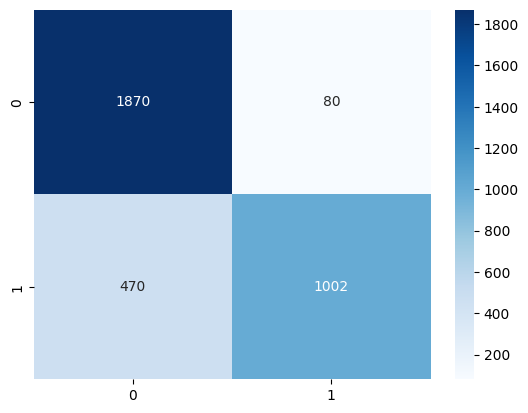

              precision    recall  f1-score   support

         0.0       0.62      0.99      0.77      1950
         1.0       0.94      0.21      0.35      1472

    accuracy                           0.66      3422
   macro avg       0.78      0.60      0.56      3422
weighted avg       0.76      0.66      0.59      3422



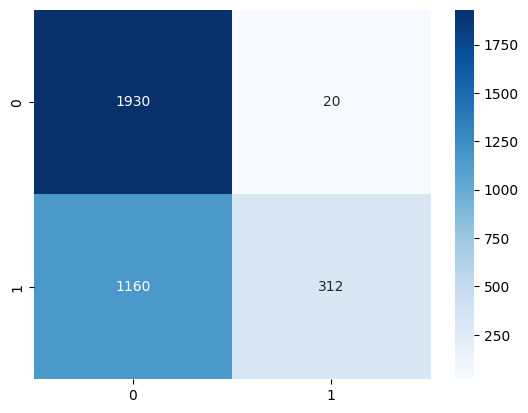

In [233]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


y_pred_lr = lr.predict(X_train)
print(classification_report(y_train, y_pred_lr))


cm = confusion_matrix(y_train, y_pred_lr)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.show()

y_pred_nb = nb.predict(X_train)
print(classification_report(y_train, y_pred_nb))

cm = confusion_matrix(y_train, y_pred_nb)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.show()


The model that performs better is Logistic Regression